[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aurelio-labs/semantic-router/blob/main/docs/00-introduction.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/aurelio-labs/semantic-router/blob/main/docs/00-introduction.ipynb)

# Multi-Modal Routes

The Semantic Router library can be used as a super fast route making layer on top of LLMs. That means rather than waiting on a slow agent to decide what to do, we can use the magic of semantic vector space to make routes. Cutting route making time down from seconds to milliseconds.

## Getting Started

We start by installing the library:

In [ ]:
!pip install -qU \
    "semantic-router[local]==0.0.21" \
    datasets==2.17.0

We start by downloading a multi-modal dataset, we'll be using the `aurelio-ai/shrek-detection` dataset from Hugging Face.

/Users/jamesbriggs/opt/anaconda3/envs/decision-layer/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


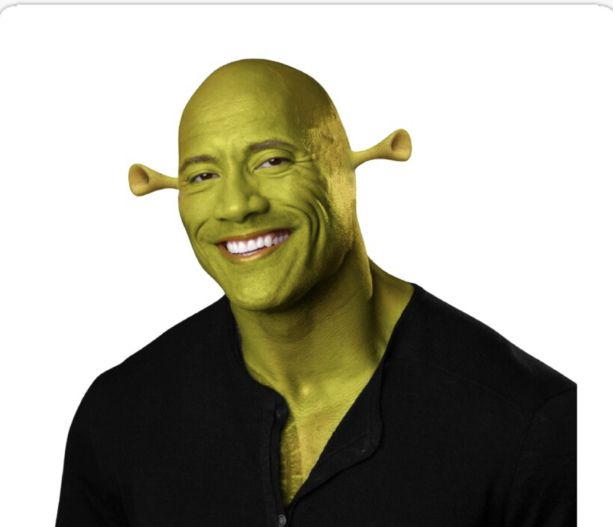

In [1]:
from datasets import load_dataset

data = load_dataset(
    "aurelio-ai/shrek-detection", split="train",
    trust_remote_code=True
)
data[3]["image"]

We will grab the images that are labeled with `is_shrek`:

In [2]:
shrek_pics = [d["image"] for d in data if d["is_shrek"]]
not_shrek_pics = [d["image"] for d in data if not d["is_shrek"]]
print(f"We have {len(shrek_pics)} shrek pics, and {len(not_shrek_pics)} not shrek pics")

We have 5 shrek pics, and 20 not shrek pics


We start by defining a dictionary mapping routes to example phrases that should trigger those routes.

In [3]:
from semantic_router import Route

shrek = Route(
    name="shrek",
    utterances=shrek_pics,
)

Let's define another for good measure:

In [7]:
not_shrek = Route(
    name="not_shrek",
    utterances=not_shrek_pics,
)

routes = [shrek, not_shrek]

Now we initialize our embedding model:

In [8]:
from semantic_router.encoders.clip import CLIPEncoder

encoder = CLIPEncoder()

Now we define the `RouteLayer`. When called, the route layer will consume text (a query) and output the category (`Route`) it belongs to — to initialize a `RouteLayer` we need our `encoder` model and a list of `routes`.

In [9]:
from semantic_router.layer import RouteLayer

rl = RouteLayer(encoder=encoder, routes=routes)

2024-02-17 23:59:30 INFO semantic_router.utils.logger local


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (25,) + inhomogeneous part.

Now we can test it:

In [ ]:
rl("don't you love politics?")

In [ ]:
rl("how's the weather today?")

Both are classified accurately, what if we send a query that is unrelated to our existing `Route` objects?

In [ ]:
rl("I'm interested in learning about llama 2")

In this case, we return `None` because no matches were identified.